In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.fft import fft2, fftshift
from skimage.draw import polygon
from skimage import io, color
from scipy.fft import fft2, ifft2, fftshift, ifftshift

In [3]:
M = np.array([[10, 25, 46], [13, 42, 233], [4, 99, 102]])
fft_M = fft2(M)
fft_magnitude = np.abs(fft_M)
fft_phase = np.angle(fft_M)
ifft_M = np.real(ifft2(fft_M))

print("Orijinal Matris:\n", M)
print("FFT Genlik:\n", fft_magnitude)
print("FFT Faz:\n", fft_phase)
print("Ters FFT ile elde edilen:\n", ifft_M)

Orijinal Matris:
 [[ 10  25  46]
 [ 13  42 233]
 [  4  99 102]]
FFT Genlik:
 [[574.         308.91908326 308.91908326]
 [180.43558407 229.79120958 106.05658867]
 [180.43558407 106.05658867 229.79120958]]
FFT Faz:
 [[-0.          2.49467197 -2.49467197]
 [-2.73185369 -0.18190143  2.12706368]
 [ 2.73185369 -2.12706368  0.18190143]]
Ters FFT ile elde edilen:
 [[ 10.  25.  46.]
 [ 13.  42. 233.]
 [  4.  99. 102.]]


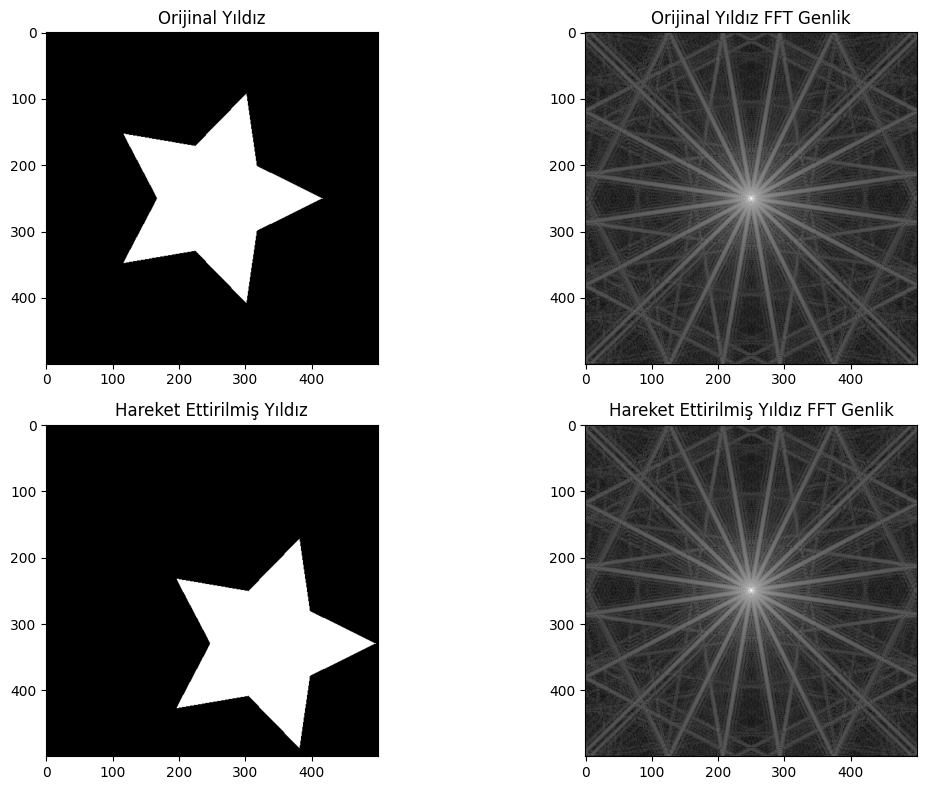

In [6]:
def create_star_image(size=500, points=5, offset=(0, 0)):
    image = np.zeros((size, size))
    center = (size // 2 + offset[0], size // 2 + offset[1])
    radius_outer = size // 3
    radius_inner = size // 6
    angles = np.linspace(0, 2 * np.pi, 2 * points, endpoint=False)  # Son nokta dahil değil
    x_points = []
    y_points = []

    for i, angle in enumerate(angles):
        if i % 2 == 0: 
            x_points.append(center[0] + radius_outer * np.cos(angle))
            y_points.append(center[1] + radius_outer * np.sin(angle))
        else: 
            x_points.append(center[0] + radius_inner * np.cos(angle))
            y_points.append(center[1] + radius_inner * np.sin(angle))

    x_points.append(x_points[0])
    y_points.append(y_points[0])
    rr, cc = polygon(y_points, x_points, shape=image.shape)
    image[rr, cc] = 1 
    return image
    
star_image = create_star_image(size=500, points=5)
fft_image = fft2(star_image)
shifted_fft = fftshift(fft_image)
magnitude = np.abs(shifted_fft)
offset_star_image = create_star_image(size=500, points=5, offset=(80, 80))
fft_image_moved = fft2(offset_star_image)
shifted_fft_moved = fftshift(fft_image_moved)
magnitude_moved = np.abs(shifted_fft_moved)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("Orijinal Yıldız")
plt.imshow(star_image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Orijinal Yıldız FFT Genlik")
plt.imshow(np.log(1 + magnitude), cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Hareket Ettirilmiş Yıldız")
plt.imshow(offset_star_image, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Hareket Ettirilmiş Yıldız FFT Genlik")
plt.imshow(np.log(1 + magnitude_moved), cmap='gray')

plt.tight_layout()
plt.show()

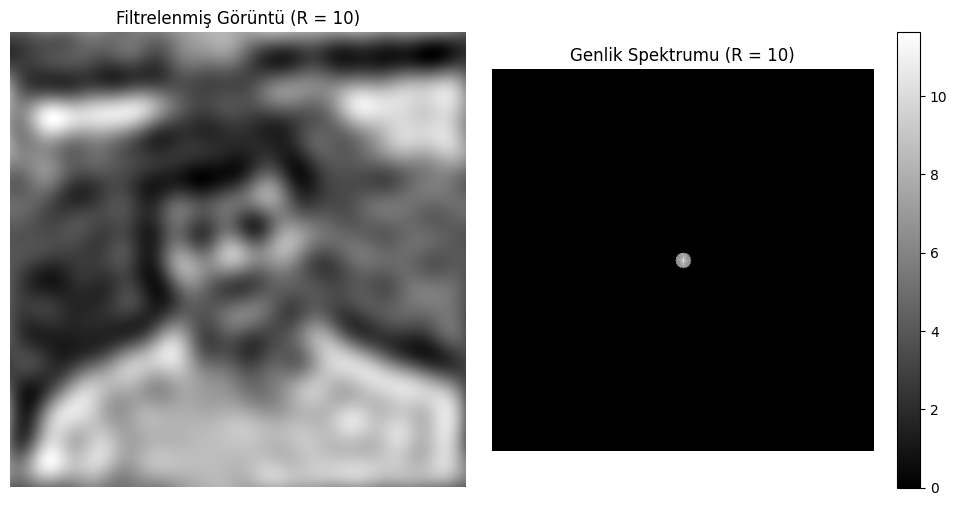

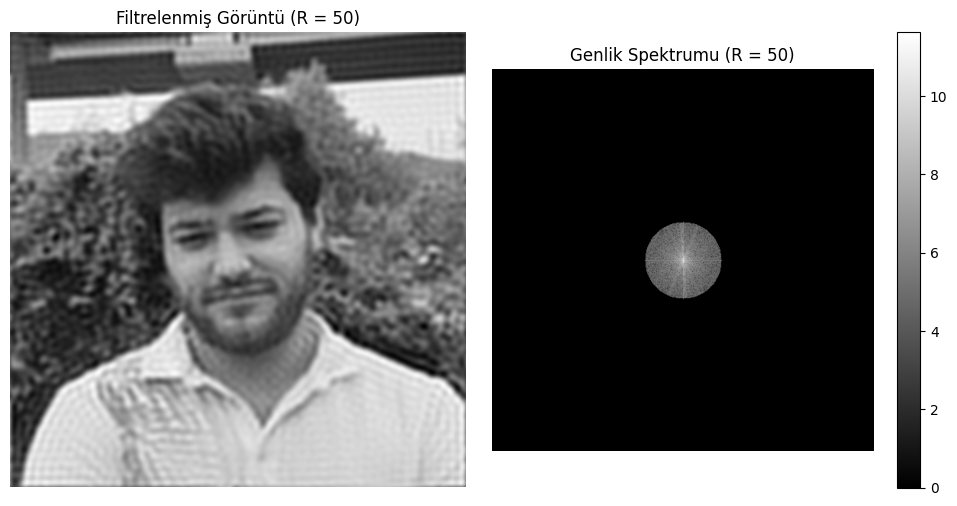

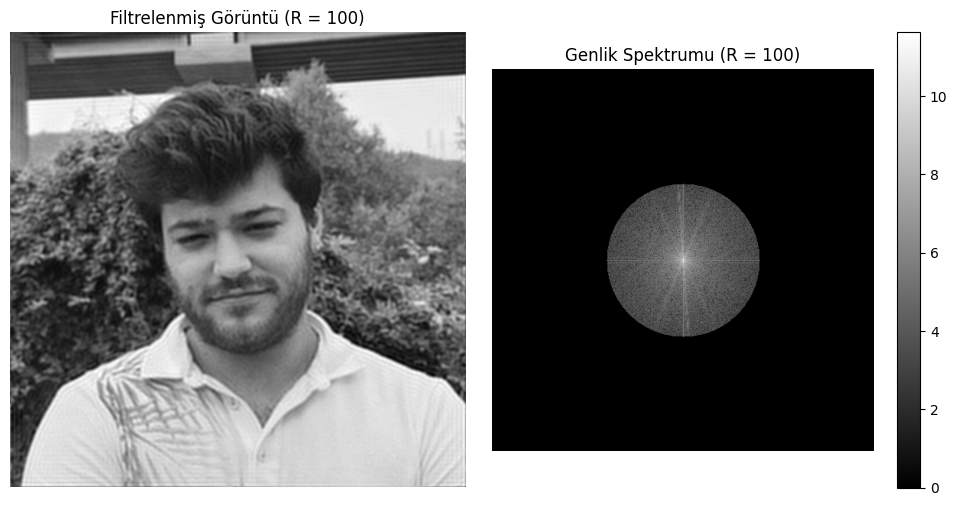

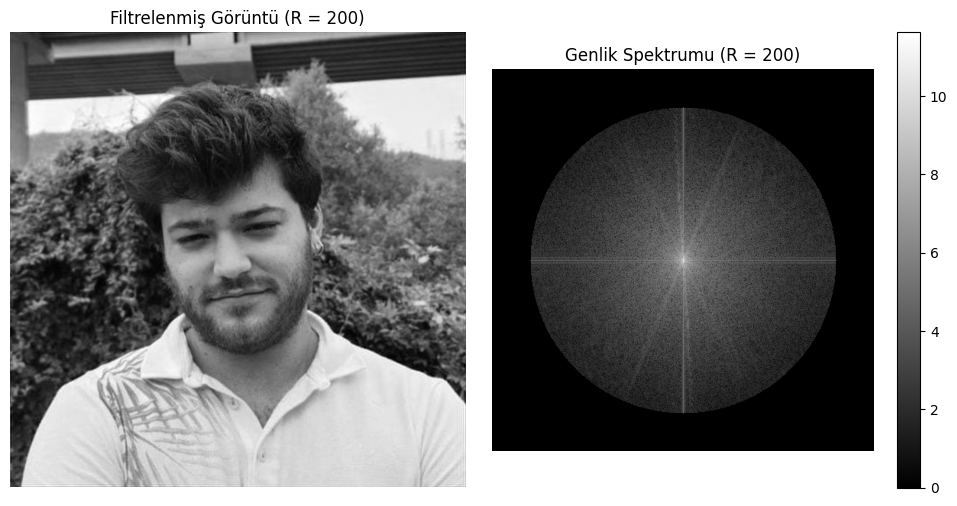

In [5]:
image = io.imread('Profile.jpeg')
image = color.rgb2gray(image)
image = image[:500, :500] 

fft_image = fft2(image)
shifted_fft = fftshift(fft_image)
rows, cols = image.shape
cx, cy = rows // 2, cols // 2

for R in [10, 50, 100, 200]:
    y, x = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - cx)**2 + (y - cy)**2)
    mask = distance <= R 

    filtered_fft = shifted_fft * mask
    filtered_image = np.real(ifft2(ifftshift(filtered_fft))) 
    magnitude_spectrum = np.log(1 + np.abs(filtered_fft))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Filtrelenmiş Görüntü (R = {R})")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Genlik Spektrumu (R = {R})")
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.colorbar() 
    plt.axis('off')  
    plt.tight_layout()
    plt.show()
